# Flight Fare prediction

# Dataset description

* **Number of variables = 11**
* **Number of rows = 10683**
* **Number of categorical type of feature = 10**
* **Number of numerical type of feature = 1**

## Detail description of each variable : 
* **Airline :  Name of the airline used for traveling**
* **Date_of_Journey :  Date at which a person travelled**
* **Source : Starting location of flight**
* **Destination : Ending location of flight**
* **Route : This contains information on starting and ending location of the journey in the standard format used by airlines.**
* **Dep_Time : Departure time of flight from starting location**
* **Arrival_Time : Arrival time of flight at destination**
* **Duration :  Duration of flight in hours/minutes**
* **Total_Stops : Number of total stops flight took before landing at the destination.**
* **Additional_Info : Shown any additional information about a flight**
* **Price :  Price of the flight**


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'D:\Capstone_project_2\Data_Train_Flight.xlsx')

In [3]:
pd.set_option("display.max_rows", None)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [583]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h 45m     62
11h         62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      60
10h 30m     57
22h 55m     57
12h 10m     57
12h 45m     56
5h 45m      54
16h 5m      53
11h 30m     52
7h 20m      52
12h 30m     52
4h 55m      51
15h 10m     51
8h 25m      50
10h 15m     50
12h         49
10h         49
10h 25m     49
12h 15m     48
6h 15m      47
11h 5m      45
5h 20m      45
26h 55m     44
9h 15m      42
14h 5m      42
13h         42
8h 55m      42
9h 20m      41
20h 10m     41
9h 35m      41
3h 10m      40
17h 5m      40
23h 40m     40
21h 15m     39
26h 35m     39
27h 35m   

In [584]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [585]:
df.dropna(inplace= True)

# EDA

<a id="airline"></a>
## Airline

In [586]:
# Airline

df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

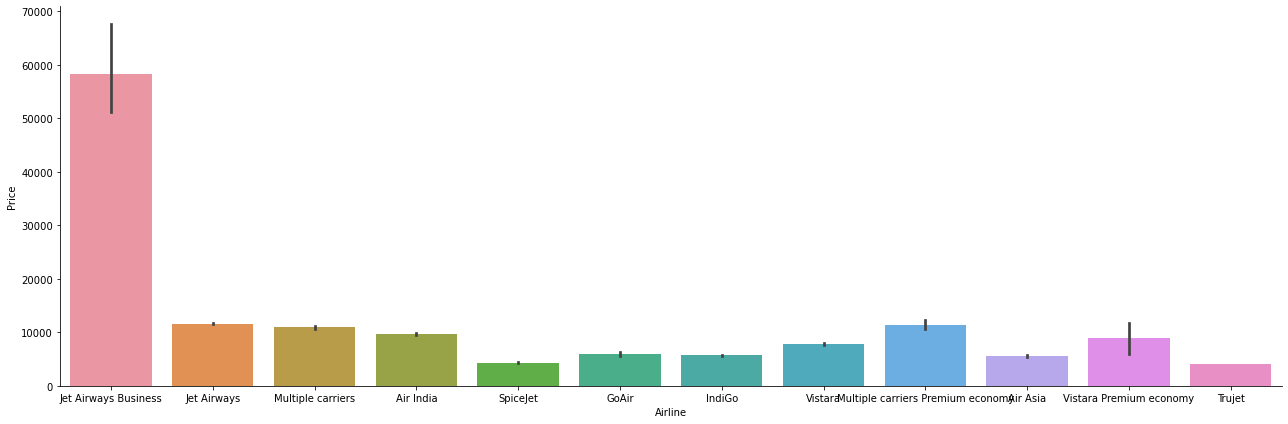

In [587]:
sns.catplot(x = 'Airline', y = 'Price' , data = df.sort_values(by = 'Price' , ascending=False), height=6, aspect=3, kind='bar');

<a id="source_destination"></a>
## Source & Destination

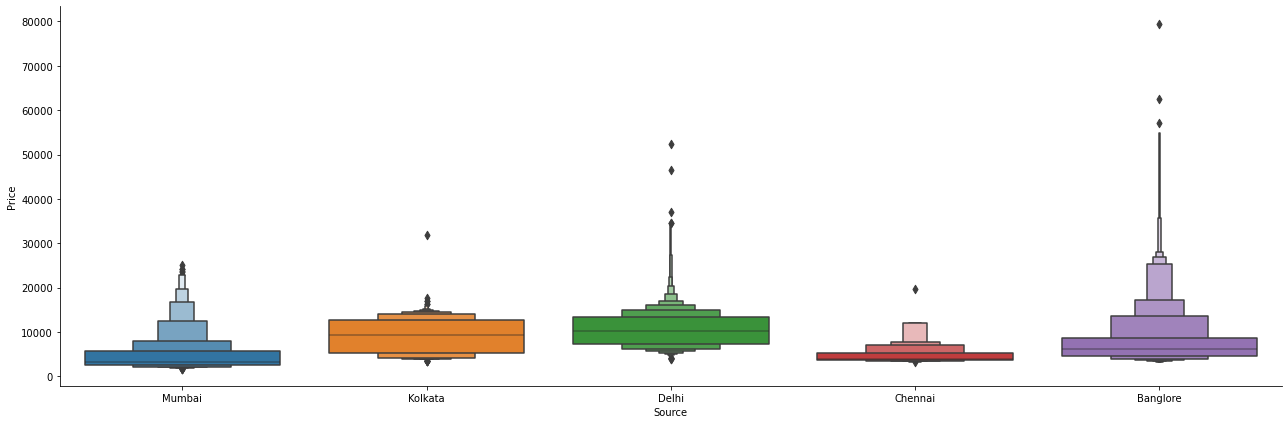

In [588]:
sns.catplot(x = 'Source', y = 'Price' , data = df.sort_values(by = 'Source' , ascending=False), height=6, aspect=3, kind='boxen');

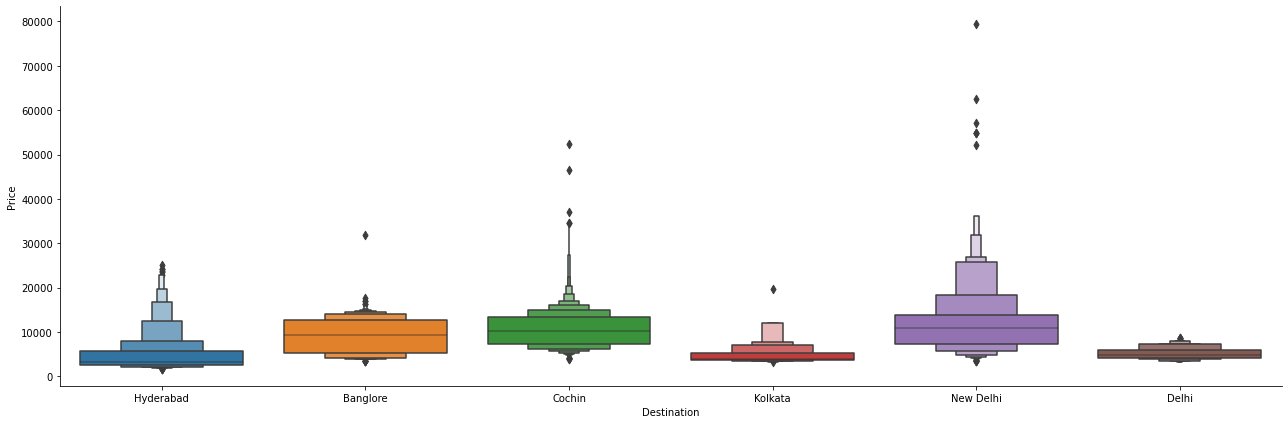

In [589]:
sns.catplot(x = 'Destination', y = 'Price' , data = df.sort_values(by = 'Source' , ascending=False), height=6, aspect=3, kind='boxen');

Hyderabad is not present in source column only in destination it presents

In [590]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [591]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

## From the discription we can see the Date_of_journey is a object data type,
## therefore, we have to convert this datatype into timestamp so has to use this column properly for prediction

## for this we require pandas to_datetime to convert object data type to datetime dtype.

## .dt.day method will extract only day of that date
## .dt.month method will extract only month of that date

In [592]:
df["journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [593]:
df["journey_Month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [594]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [595]:
#since we have converted date_of_journey column into integers , now we can drop its has no use.
df.drop(["Date_of_Journey"], axis=1, inplace= True)

In [596]:
#departure time is when a plan is leaves the gete.
#similar to date_of_journey we can extract values from Dep_Time

In [597]:
#extracting hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [598]:
#extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [599]:
#now we drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis=1, inplace=True)

In [600]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [601]:
#Arrival time is when the plane pulls up to the gate.
#similar to date_of_Journey we can extract values from Arrival_Time

#Extracting Hours 
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour


#Extracting Minutes
df["Arrival_min"]= pd.to_datetime(df.Arrival_Time).dt.minute

#now we can drop arrival_time as it is of no use 
df.drop(["Arrival_Time"], axis=1,inplace= True)





In [602]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [603]:
# Duration

# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins


df.drop(["Duration"], axis = 1, inplace = True)

In [604]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


<a id="cat_data"></a>
# Handling Categorical Data


One can find many ways to handle categorical data. Some of them are,

1. **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
2. **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int64 
 8   journey_Month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [606]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

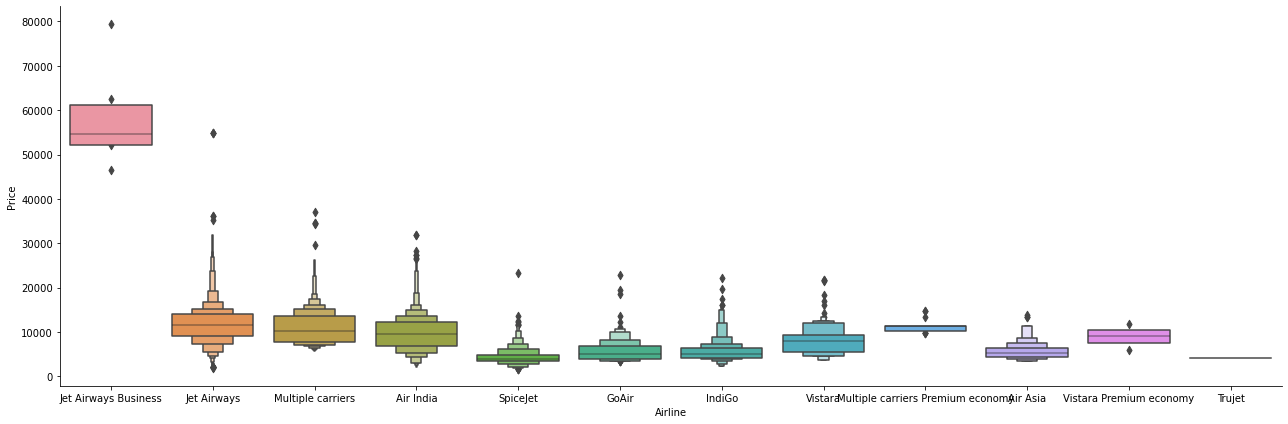

In [607]:
#From graph we can see that jet Airways bussines have the highest price.
#Apart from the first airline almost all are having similar median

#Airline vs price
sns.catplot(y = "Price" , x = "Airline", data= df.sort_values("Price", ascending= False ), kind= "boxen", height = 6, aspect = 3)
plt.show()

In [608]:
#as airline is Nominal Categorical data we will perform OnehotEncoding 

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline,drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [609]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

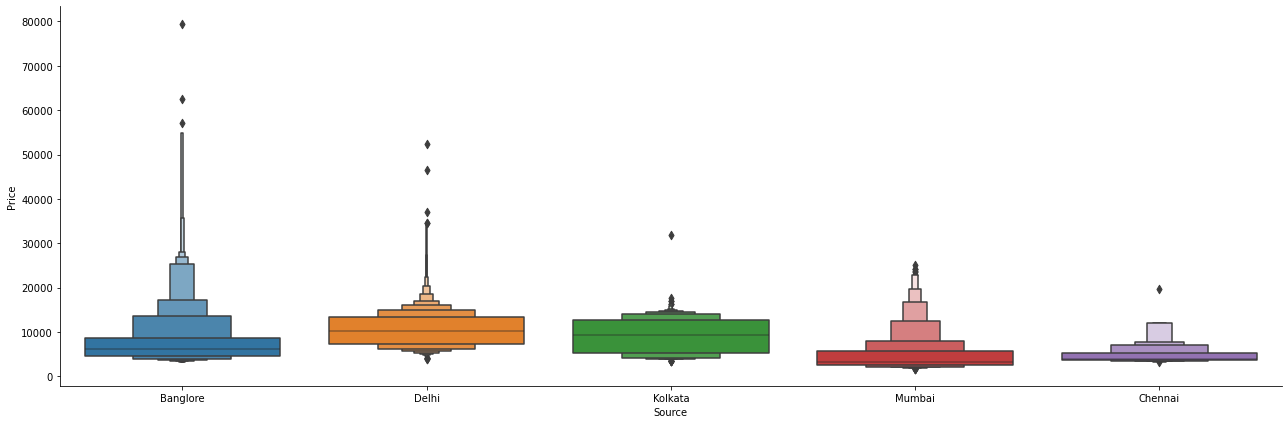

In [610]:
#Source vs price 
sns.catplot(y = "Price", x = "Source", data= df.sort_values("Price", ascending= False ), kind= "boxen", height = 6, aspect = 3)
plt.show()

In [611]:
# AS Source is  Nominal categorical data we will perform OneHotEncoding 
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [612]:
 df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [613]:
# AS Destination is  Nominal categorical data we will perform OneHotEncoding 
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [614]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [615]:
df['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

In [616]:
Add_info = df[["Additional_Info"]]
Add_info = pd.get_dummies(Add_info, drop_first = True)

In [617]:
df["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

In [618]:
#Route and Total_stops are related to each other.

df.drop(["Route"], axis=1 , inplace= True)

In [619]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [620]:
#as this is case of Ordinal Categorical type we perform LableEncoder
# Here value assigned with corresponding keys
df.replace({"non-stop" : 0, "1 stop" : 1, "2 stops":2, "3 stops":3, "4 stops": 4}, inplace= True)

In [621]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No Info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No Info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No Info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No Info,13302,1,3,16,50,21,35,4,45


In [623]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_Month,Dep_hour,Dep_min,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,0,No Info,3897,24,3,22,20,...,0,1,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,No Info,7662,1,5,5,50,...,0,0,0,0,0,0,0,1,0,0
2,Jet Airways,Delhi,Cochin,2,No Info,13882,9,6,9,25,...,0,0,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,No Info,6218,12,5,18,5,...,0,0,0,0,0,0,0,1,0,0
4,IndiGo,Banglore,New Delhi,1,No Info,13302,1,3,16,50,...,0,1,0,0,0,0,0,1,0,0


In [622]:
# concatenate datafram --> df + Airline + Source + Destination + Add_info

data_train= pd.concat([df,Airline,Source, Destination,Add_info ], axis=1)

In [624]:
data_train.drop(["Airline","Source","Destination","Additional_Info"], axis=1, inplace= True)

In [625]:
data_train.head()

,Total_Stops,Price,journey_day,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,1,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,0,0,0,1,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,1,0,0,0,0,0,1,0,0


In [626]:
data_train.shape

(10682, 38)

In [627]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10682 non-null  int64
 1   Price                                         10682 non-null  int64
 2   journey_day                                   10682 non-null  int64
 3   journey_Month                                 10682 non-null  int64
 4   Dep_hour                                      10682 non-null  int64
 5   Dep_min                                       10682 non-null  int64
 6   Arrival_hour                                  10682 non-null  int64
 7   Arrival_min                                   10682 non-null  int64
 8   Duration_hours                                10682 non-null  int64
 9   Duration_mins                                 10682 non-null  int64
 10  Airline_Ai

# Feature Selection
Finding out best Feature whitch will contribute and have good relation with target variable.
Following are some of the feature selection methods.

1.heatmap
2.feature_importance
3.SelectKBest
4.feature scaling

In [628]:
data_train.shape



(10682, 38)

In [629]:
data_test.shape

(10682, 36)

In [630]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-

In [631]:
x = data_train.loc[:,['Total_Stops', 'journey_day', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-eye flight']]
x.head()

,Total_Stops,journey_day,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,24,3,22,20,1,10,2,50,0,...,0,1,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,1,0,0,0,0,0,1,0,0


In [632]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

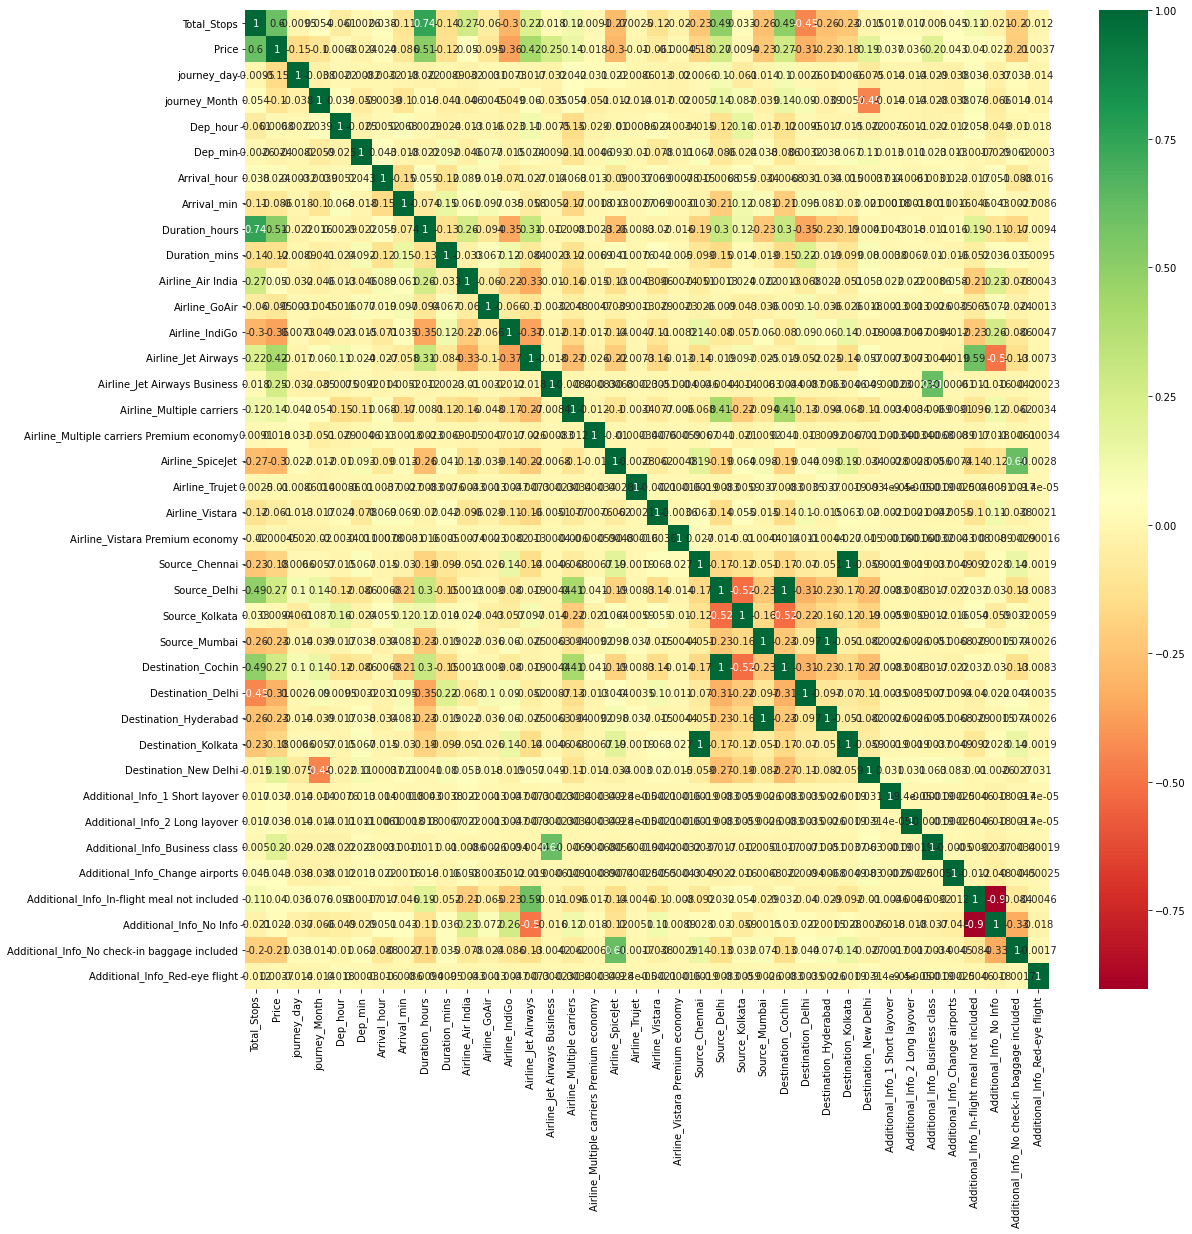

In [633]:
#finds correlation between independent and dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(), annot= True, cmap= "RdYlGn")

In [634]:
#Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

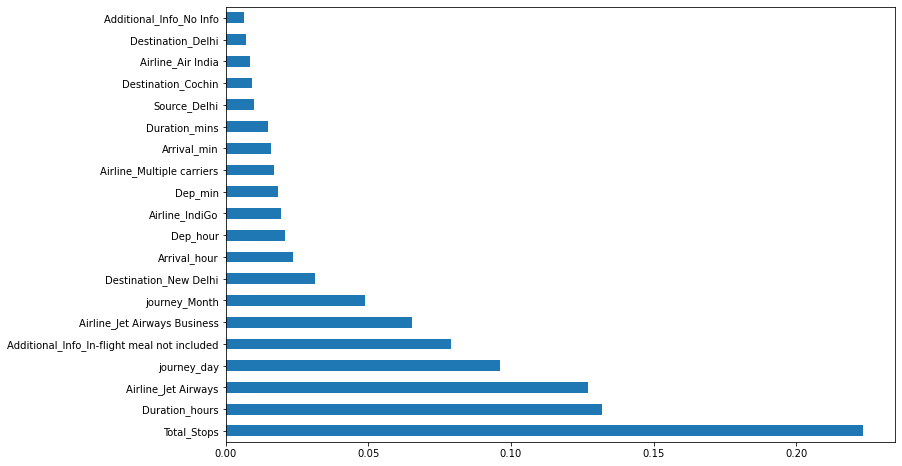

In [635]:
#plot graph of feature importance for better visualization 
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [636]:
feat_importances

Total_Stops                                     0.223572
journey_day                                     0.096080
journey_Month                                   0.048788
Dep_hour                                        0.020819
Dep_min                                         0.018362
Arrival_hour                                    0.023717
Arrival_min                                     0.015749
Duration_hours                                  0.131906
Duration_mins                                   0.014800
Airline_Air India                               0.008541
Airline_GoAir                                   0.001852
Airline_IndiGo                                  0.019368
Airline_Jet Airways                             0.127060
Airline_Jet Airways Business                    0.065283
Airline_Multiple carriers                       0.016805
Airline_Multiple carriers Premium economy       0.000808
Airline_SpiceJet                                0.003459
Airline_Trujet                 

In [ ]:
'Total_Stops', 'journey_day', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-eye flight'

In [743]:
x = data_train.loc[:,['Additional_Info_No Info','Destination_Delhi','Airline_Air India','Destination_Cochin','Source_Delhi','Duration_mins','Arrival_min',
                      'Airline_Multiple carriers','Dep_min','Airline_IndiGo','Dep_hour','Arrival_hour','Destination_New Delhi','journey_Month','Airline_Jet Airways Business','Additional_Info_In-flight meal not included','journey_day','Airline_Jet Airways','Duration_hours','Total_Stops']]
x.head()

,Additional_Info_No Info,Destination_Delhi,Airline_Air India,Destination_Cochin,Source_Delhi,Duration_mins,Arrival_min,Airline_Multiple carriers,Dep_min,Airline_IndiGo,Dep_hour,Arrival_hour,Destination_New Delhi,journey_Month,Airline_Jet Airways Business,Additional_Info_In-flight meal not included,journey_day,Airline_Jet Airways,Duration_hours,Total_Stops
0,1,0,0,0,0,50,10,0,20,1,22,1,1,3,0,0,24,0,2,0
1,1,0,1,0,0,25,15,0,50,0,5,13,0,5,0,0,1,0,7,2
2,1,0,0,1,1,0,25,0,25,0,9,4,0,6,0,0,9,1,19,2
3,1,0,0,0,0,25,30,0,5,1,18,23,0,5,0,0,12,0,5,1
4,1,0,0,0,0,45,35,0,50,1,16,21,1,3,0,0,1,0,4,1


In [1094]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [1095]:
# Collect all R2 Scores , MSE , MAE , RMSE 

R2_Scores = []
MSE = []  
MAE = []
RMSE = []

models = []  

## 1) Linear Regression

In [1096]:
from sklearn.linear_model import LinearRegression 
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)

LinearRegression()

In [1097]:
linearRegressor.intercept_

6592.066968928599

In [1098]:
linearRegressor.coef_

array([ 3.16170456e+02, -4.58643107e+02,  7.78506005e+02,  1.86031500e+02,
        1.86031500e+02,  1.02624548e-01,  1.81820382e+00,  3.20880567e+03,
       -6.63649674e+00, -4.06205254e+02,  2.97023362e+01,  5.70459248e-01,
        2.20568212e+03, -3.40971988e+02,  4.07141390e+04, -3.20297510e+03,
       -6.83178614e+01,  5.24606860e+03,  2.94106604e+01,  2.63452379e+03])

In [1099]:
y_pred = linearRegressor.predict(x_test)
y_pred

array([ 4242.87376924, 10584.88195754,  9836.69389863, ...,
        7664.11540865,  9902.75931085, 11100.18205007])

In [1100]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error 

In [1101]:
Algorithm_Name = "Linear Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1102]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: Linear Regression
R2 :  0.7185680801063002
MAE : 1809.2059198573484
MSE :  6620740.897516712
RMSE :  2573.080041024125


# Ridge

In [1103]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(x_train, y_train)

Ridge()

In [1104]:
y_pred = rr.predict(x_test)
y_pred

array([ 4266.55374006, 10575.20022159,  9891.24064825, ...,
        7704.23060128,  9899.20061289, 11082.87971113])

In [1105]:
Algorithm_Name = "Ridge Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1106]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: Ridge Regression
R2 :  0.7028840632439012
MAE : 1819.4272609714112
MSE :  6989710.458316528
RMSE :  2643.806055352118


# Lasso

In [1107]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)

In [1108]:
lassoreg.fit(x_train, y_train)

Lasso(alpha=0.001, normalize=True)

In [1109]:
y_pred = lassoreg.predict(x_test)
y_pred

array([ 4242.87394548, 10584.60161316,  9836.97967418, ...,
        7664.77763098,  9902.98371273, 11100.38928818])

In [1110]:
Algorithm_Name = "Lasso Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1111]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: Lasso Regression
R2 :  0.7185581319908306
MAE : 1809.198163897559
MSE :  6620974.928876651
RMSE :  2573.125517513021


# Decision Tree

In [1112]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [1113]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [1114]:
y_pred = dt.predict(x_test)
y_pred

array([ 3841., 14848.,  8714., ...,  6790., 10577., 10861.])

In [1115]:
Algorithm_Name = "Decision Tree"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1116]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: Decision Tree
R2 :  0.8424061194965713
MAE : 817.8118078302917
MSE :  3707426.8272110433
RMSE :  1925.4679501905616


## RandomForestRegressor

In [1117]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [1118]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [1119]:
y_pred = rf.predict(x_test)
y_pred

array([ 4172.42 , 14383.32 ,  8981.38 , ...,  8505.65 , 10388.   ,
       11087.864])

In [1120]:
Algorithm_Name = "RandomForest Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1121]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: RandomForest Regression
R2 :  0.8865667211246179
MAE : 705.7807153259313
MSE :  2668540.046464265
RMSE :  1633.5666642241035


In [1122]:
rf.feature_importances_

array([5.60079252e-03, 3.02262930e-04, 6.05761977e-03, 4.41799156e-03,
       4.50765615e-03, 1.54322325e-02, 1.67606079e-02, 1.86278557e-02,
       1.99277894e-02, 6.45010074e-03, 2.46906446e-02, 3.30643319e-02,
       3.16239564e-02, 5.03672504e-02, 4.38131356e-02, 8.14042903e-02,
       1.06672708e-01, 6.62242543e-02, 4.30649760e-01, 3.34047587e-02])

# AdaBoostRegressor

In [1123]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(random_state=0)

In [1124]:
adb.fit(x_train,y_train)

AdaBoostRegressor(random_state=0)

In [1125]:
y_pred = adb.predict(x_test)
y_pred

array([ 8871.67552602, 11585.26144366, 13089.62194316, ...,
       12071.20910125, 12165.18349206, 12165.18349206])

In [1126]:
Algorithm_Name = "AdaBoost Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1127]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: AdaBoost Regression
R2 :  0.19555294138319645
MAE : 3621.341597007833
MSE :  18924774.21496113
RMSE :  4350.261396164733


# GradientBoostingRegressor

In [1128]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)

In [1129]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(random_state=0)

In [1130]:
y_pred = gbr.predict(x_test)
y_pred

array([ 3961.41259283, 10724.20972945,  7847.91716001, ...,
        8571.0520673 , 11229.8472491 , 11587.53824167])

In [1131]:
Algorithm_Name = "GradientBoosting Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1132]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: GradientBoosting Regression
R2 :  0.8301958105460912
MAE : 1261.7260441171832
MSE :  3994676.730741151
RMSE :  1998.6687396217392


# XGBRegressor

In [1133]:
import xgboost as xg
xgb_r = xg.XGBRegressor()                  

In [1134]:
#! pip install xgboost

In [1135]:
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1136]:
y_pred = xgb_r.predict(x_test)
y_pred

array([ 3834.8271, 13755.339 ,  7414.0835, ...,  7835.9233, 10355.279 ,
       10817.715 ], dtype=float32)

In [1137]:
Algorithm_Name = "XGBRegressor Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1138]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: XGBRegressor Regression
R2 :  0.9148992516580666
MAE : 765.581733243065
MSE :  2002011.730472968
RMSE :  1414.924637736218


In [1139]:
error_train = y_train - y_train_pred          ## ERROR = Actual value - Predicted value
error_test = y_test - y_pred

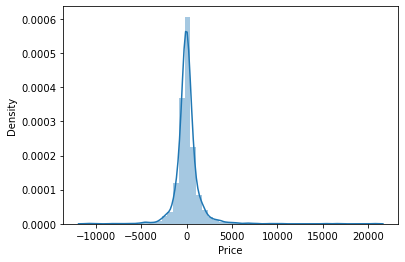

In [1140]:
sns.distplot(y_test-y_pred)
plt.show()

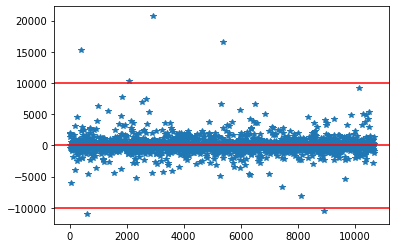

In [1141]:
plt.plot(error_test , "*")                                
plt.axhline(y = error_train.mean() , color = "r")
plt.axhline ( y = 10000 , color = "r")
plt.axhline ( y = -10000 , color = "r")

## here we see that our data is equally distributed

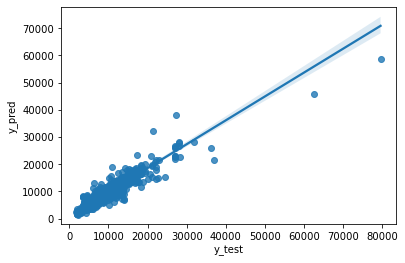

In [1142]:
sns.regplot(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## On X-axis ACTUAL VALUES 
## On Y-axis PREDICTED VALUES 

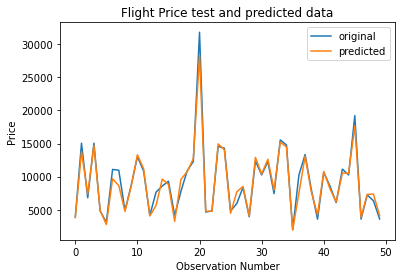

In [1143]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# KNeighborsRegressor

In [1144]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [1145]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [1146]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [1147]:
y_pred = knn.predict(x_test)
y_pred

array([ 4251.8, 10433.8,  5519.8, ..., 10301.4, 13945.6, 12621.4])

In [1148]:
Algorithm_Name = "KNeighbours Regression"
r2 =  r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

models.append(Algorithm_Name)
R2_Scores.append(r2)
MSE.append(mse) 
MAE.append(mae)
RMSE.append(rmse)

In [1149]:
print('Algorithm Name:',  Algorithm_Name)
print('R2 : ' ,  r2)
print("MAE :" ,  mae)
print("MSE : " ,  mse)
print("RMSE : " ,  rmse)

Algorithm Name: KNeighbours Regression
R2 :  0.6028430942038217
MAE : 1792.3495554515675
MSE :  9343193.799513336
RMSE :  3056.6638348881834


# Comparing all models 

In [1150]:
a = {'Algorithms' : models , 
    'R2-Scores' : R2_Scores  , 
    'MSE_score' : MSE , 
    'MAE_score' : MAE , 
    'RMSE_score' : RMSE }

df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()
df

,Algorithms,R2-Scores,MSE_score,MAE_score,RMSE_score
0,Linear Regression,0.718568,6620740.897517,1809.20592,2573.080041
1,Ridge Regression,0.702884,6989710.458317,1819.427261,2643.806055
2,Lasso Regression,0.718558,6620974.928877,1809.198164,2573.125518
3,Decision Tree,0.842406,3707426.827211,817.811808,1925.46795
4,RandomForest Regression,0.886567,2668540.046464,705.780715,1633.566664
5,AdaBoost Regression,0.195553,18924774.214961,3621.341597,4350.261396
6,GradientBoosting Regression,0.830196,3994676.730741,1261.726044,1998.66874
7,XGBRegressor Regression,0.914899,2002011.730473,765.581733,1414.924638
8,KNeighbours Regression,0.602843,9343193.799513,1792.349555,3056.663835
